![](images/mk.png)

<h1><center>ONLINE SUPPLEMENT</center></h1>

John McLevey & Reid-McIlroy-Young. **Introducing *metaknowledge*: Software for Computational Research in Information Science, Science of Science, and Network Analysis.** *Journal of Informetrics*. XX(XX):XX-XX.

<h1><center>Part 1: Working With Record Collections</center></h1>

These supplementary notebooks were prepared by Dr. [John McLevey](http://www.johnmclevey.com/) (University of Waterloo), [Reid McIlroy-Young](http://reidmcy.com/) (University of Chicago), and [Jillian Anderson](http://networkslab.org/) (NetLab, University of Waterloo). The code in this notebook is current as of *metaknowledge* version XXX.

# Getting Started

### Installing Python, the Scientific Stack, and metaknowledge

This Github repository contains the data and executable code accompanying our article "Introducing metaknowledge: Software for Computational Research in Information Science, Science of Science, and Network Analysis."

To use this Juputer Notebook: 

1. Download or clone this [Github repository](https://github.com/mclevey/metaknowledge_article_supplement)
2. Download and install the [Anaconda distribution of Python3](https://www.continuum.io/downloads)
3. Download and install the current public releases of *metaknowledge*, *networkx*, and *NLTK* as described in the article text
4. From the same directory the Jupyter Notebook is in, type `jupyter notebook` on the command line

### Load Packages

In [34]:
%matplotlib inline

import metaknowledge as mk
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import pandas

sns.set_style(style="white") # change the default background plot colour
sns.set(font_scale=.75)
plt.rc("savefig", dpi=300) # improve default resolution of graphics

The data files for our notebooks should be in a directory called `raw_data`.

# Creating and Processing Record Collections

### Parsing Raw Data to Create Records and RecordCollections

We have already set the working directory. All we need to do to create a `Record Collection` is provide the rest of the file path to the raw data. We will use the information science and bibliometrics dataset used in the "Introducing *metaknowledge*" article.

In [3]:
RC = mk.RecordCollection('raw_data/imetrics/', cached = True)

We can easily write the full dataframe to a `.csv` file using the `writeCSV` method. This file can, of course, be used by any other research software.

In [4]:
RC.writeCSV('generated_datasets/records.csv')

Of course it is also possible to continue working in Python. *metaknowledge* has some useful functions for working with `Record Collections`, but researchers can also use other Python packages such as *Pandas*. 

The code block below uses the *metaknowledge* method `yearSplit` to extract the records published in 2013 and 2014 and shows the estimates for author gender. The process for estimating author genders uses birth record and name data. It is described in the article. 

In [5]:
RC1314 = RC.yearSplit(2013, 2014)
gender_breakdown = RC1314.genderStats()
gender_breakdown

{'Female': 506, 'Male': 1349, 'Unknown': 1361}

The `glimpse` method in *metaknowledge* is a convienent way to quickly view the most frequently occuring authors and journals, and the most highly cited articles. It will print a quick summary to screen. 

In [6]:
print(RC.glimpse())

+RecordCollection glimpse made at: 2016-12-12 15:47:07++++++++++++++++++++++++++
|8140 Records from files-from-raw_data/imetrics/+++++++++++++++++++++++++++++++|
|Columns are ranked by num. of occurrences and are independent of one another++|
|-------Top Authors--------+------Top Journals-------+--------Top Cited--------|
|1           Bornmann, Lutz|1          SCIENTOMETRICS|1 Hirsch JE, 2005, P NAT.|
|2        Leydesdorff, Loet|2 JOURNAL OF THE AMERICA.|2 Egghe L, 2006, SCIENTO.|
|3           Thelwall, Mike|3 JOURNAL OF INFORMETRICS|3 SMALL H, 1973, J AM SO.|
|4         Rousseau, Ronald|4 JOURNAL OF THE ASSOCIA.|4 GARFIELD E, 1972, SCIE.|
|5              SCHUBERT, A|-1                     NA|5 Glanzel W, 2001, SCIEN.|
|6         Abramo, Giovanni|-1                     NA|5 MERTON RK, 1968, SCIEN.|
|6 D'Angelo, Ciriaco Andrea|-1                     NA|6 Leydesdorff L, 2011, J.|
|7        Glanzel, Wolfgang|-1                     NA|6 PRICE DJD, 1965, SCIEN.|
|8               Glanzel, W|

While `glimpse` is useful for getting a quick sense of the most frequently appearing authors and journals, and the most highly cited documents, most research workflows require direct interaction with the data stored in the `Record Collection`. The easiest way to do this is to convert the `Record Collection` into a [Pandas](http://pandas.pydata.org/pandas-docs/stable/) dataframe. This provides access to a wide range of methods for selecting, filtering, grouping, summarizing, modeling, and plotting data. 

In addition to the *Pandas* documentation, researchers may want to consult Wes McKinney's book [*Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython-ebook/dp/B009NLMB8Q) or an online tutorial (e.g. Julia Evans' [Pandas cookbook](https://jvns.ca/blog/2013/12/22/cooking-with-pandas/)).

In [7]:
df = pandas.DataFrame(RC.makeDict())
selectedVars = df[['AF', 'AB', 'PY', 'TI', 'SO', 'num-Authors', 'TC']]
selectedVars

,AF,AB,PY,TI,SO,num-Authors,TC
0,"[de Mesnard, Louis]",We discuss each of the recommendations made by...,2010,"On Hochberg et al.'s ""The tragedy of the revie...",SCIENTOMETRICS,1,1
1,"[Vilanova, MR, Leydesdorff, L]",We present a model to assess the systemness of...,2001,Why Catalonia cannot be considered as a region...,SCIENTOMETRICS,2,5
2,"[Verberne, Suzan, van der Heijden, Maarten, Hi...","In most intent recognition studies, annotation...",2013,Reliability and Validity of Query Intent Asses...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,7,2
3,"[Kellar, Melanie, Watters, Carolyn, Shepherd, ...",Previous studies have examined various aspects...,2007,A field study characterizing Web-based informa...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,3,56
4,"[Wu, I-Chin, Niu, Yun-Fang]",This study explores how the stability of users...,2015,Effects of Anchoring Process Under Preference ...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,2,0
5,"[Luis Ortega, Jose, Aguillo, Isidro F.]",This paper aims to explore the role of each co...,2010,Network collaboration in the 6th Framework Pro...,SCIENTOMETRICS,2,2
6,"[Leta, J, Lewison, G]",The performance of Brazilian male and female s...,2003,The contribution of women in Brazilian science...,SCIENTOMETRICS,2,28
7,"[Davis, L]","The author describes some of the challenges, d...",2006,Designing a search user interface for a digita...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,1,3
8,"[Sugimoto, Cassidy R., Lariviere, Vincent, Ni,...",There are many indicators of journal quality a...,2013,Journal acceptance rates: A cross-disciplinary...,JOURNAL OF INFORMETRICS,4,8
9,"[Rajabi, Enayat, Sanchez-Alonso, Salvador, Sic...",Linked open data allow interlinking and integr...,2014,Analyzing Broken Links on the Web of Data: An ...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,3,3


The two letter variable names are the tags used by Web of Science. A description of the content of each tag is available [online](https://images.webofknowledge.com/images/help/WOS/h_fieldtags.html). The code block above shows 7 tags that are typically of interest, but there are many others available. 

In [8]:
df.columns.values.tolist()

['AB',
 'AF',
 'AU',
 'BP',
 'C1',
 'CA',
 'CL',
 'CR',
 'CT',
 'CY',
 'DE',
 'DI',
 'DT',
 'EI',
 'EM',
 'EP',
 'FU',
 'FX',
 'GA',
 'HO',
 'ID',
 'IS',
 'J9',
 'JI',
 'LA',
 'NR',
 'OI',
 'PA',
 'PD',
 'PG',
 'PI',
 'PM',
 'PT',
 'PU',
 'PY',
 'RI',
 'RP',
 'SC',
 'SI',
 'SN',
 'SO',
 'SP',
 'TC',
 'TI',
 'U1',
 'U2',
 'UT',
 'VL',
 'WC',
 'Z9',
 'num-Authors',
 'num-Female',
 'num-Male',
 'num-Unknown']

We can sort these dataframe by any quantitative variable. Below, we show the 40 most highly cited articles in the dataset. Changing or removing the `[:40]` affects the number of records shown.

In [9]:
top_40 = selectedVars.sort_values(['TC'], ascending = False)[:40]
top_40

,AF,AB,PY,TI,SO,num-Authors,TC
5331,"[Egghe, Leo]",The g-index is introduced as an improvement of...,2006,Theory and practise of the g-index,SCIENTOMETRICS,1,538
3017,"[Ho, YS]",This study presents a literature review concer...,2004,Citation review of Lagergren kinetic rate equa...,SCIENTOMETRICS,1,527
1584,"[Liben-Nowell, David, Kleinberg, Jon]","Given a snapshot of a social network, can we i...",2007,The link-prediction problem for social networks,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,2,437
565,"[Spink, A, Wolfram, D, Jansen, MBJ, Saracevic, T]",In studying actual Web searching by the public...,2001,Searching the Web: The public and their queries,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,4,365
2730,"[Meho, Lokman I., Yang, Kiduk]",The Institute for Scientific Information's (IS...,2007,Impact of data sources on citation counts and ...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,2,315
7889,"[Jansen, Bernard J., Zhang, Mimi, Sobel, Kate,...",In this paper we report research results inves...,2009,Twitter Power: Tweets as Electronic Word of Mouth,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,4,308
6079,"[Chen, CM]",This article describes the latest development ...,2006,CiteSpace II: Detecting and visualizing emergi...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,1,293
885,"[Boyack, KW, Klavans, R, Borner, K]",This paper presents a new map representing the...,2005,Mapping the backbone of science,SCIENTOMETRICS,3,288
3587,"[Van Raan, AFJ]",In this paper we present characteristics of th...,2006,Comparison of the Hirsch-index with standard b...,SCIENTOMETRICS,1,262
3073,"[MOED, HF, DEBRUIN, RE, VANLEEUWEN, TN]",This paper gives an outline of a new bibliomet...,1995,NEW BIBLIOMETRIC TOOLS FOR THE ASSESSMENT OF N...,SCIENTOMETRICS,3,259


We will create a new column called `short_title` that will contain the first 20 characters in the title. We can then use this new variable to create a horizontal bar graph with reasonable labels on the y-axis. (If we did not shorten them, the y-axis label would be as wide as the longest article title.)

In [10]:
top_40['short_title'] = top_40['TI'].str[:20]
top_40[['TI', 'short_title', 'TC']]

,TI,short_title,TC
5331,Theory and practise of the g-index,Theory and practise,538
3017,Citation review of Lagergren kinetic rate equa...,Citation review of L,527
1584,The link-prediction problem for social networks,The link-prediction,437
565,Searching the Web: The public and their queries,Searching the Web: T,365
2730,Impact of data sources on citation counts and ...,Impact of data sourc,315
7889,Twitter Power: Tweets as Electronic Word of Mouth,Twitter Power: Tweet,308
6079,CiteSpace II: Detecting and visualizing emergi...,CiteSpace II: Detect,293
885,Mapping the backbone of science,Mapping the backbone,288
3587,Comparison of the Hirsch-index with standard b...,Comparison of the Hi,262
3073,NEW BIBLIOMETRIC TOOLS FOR THE ASSESSMENT OF N...,NEW BIBLIOMETRIC TOO,259


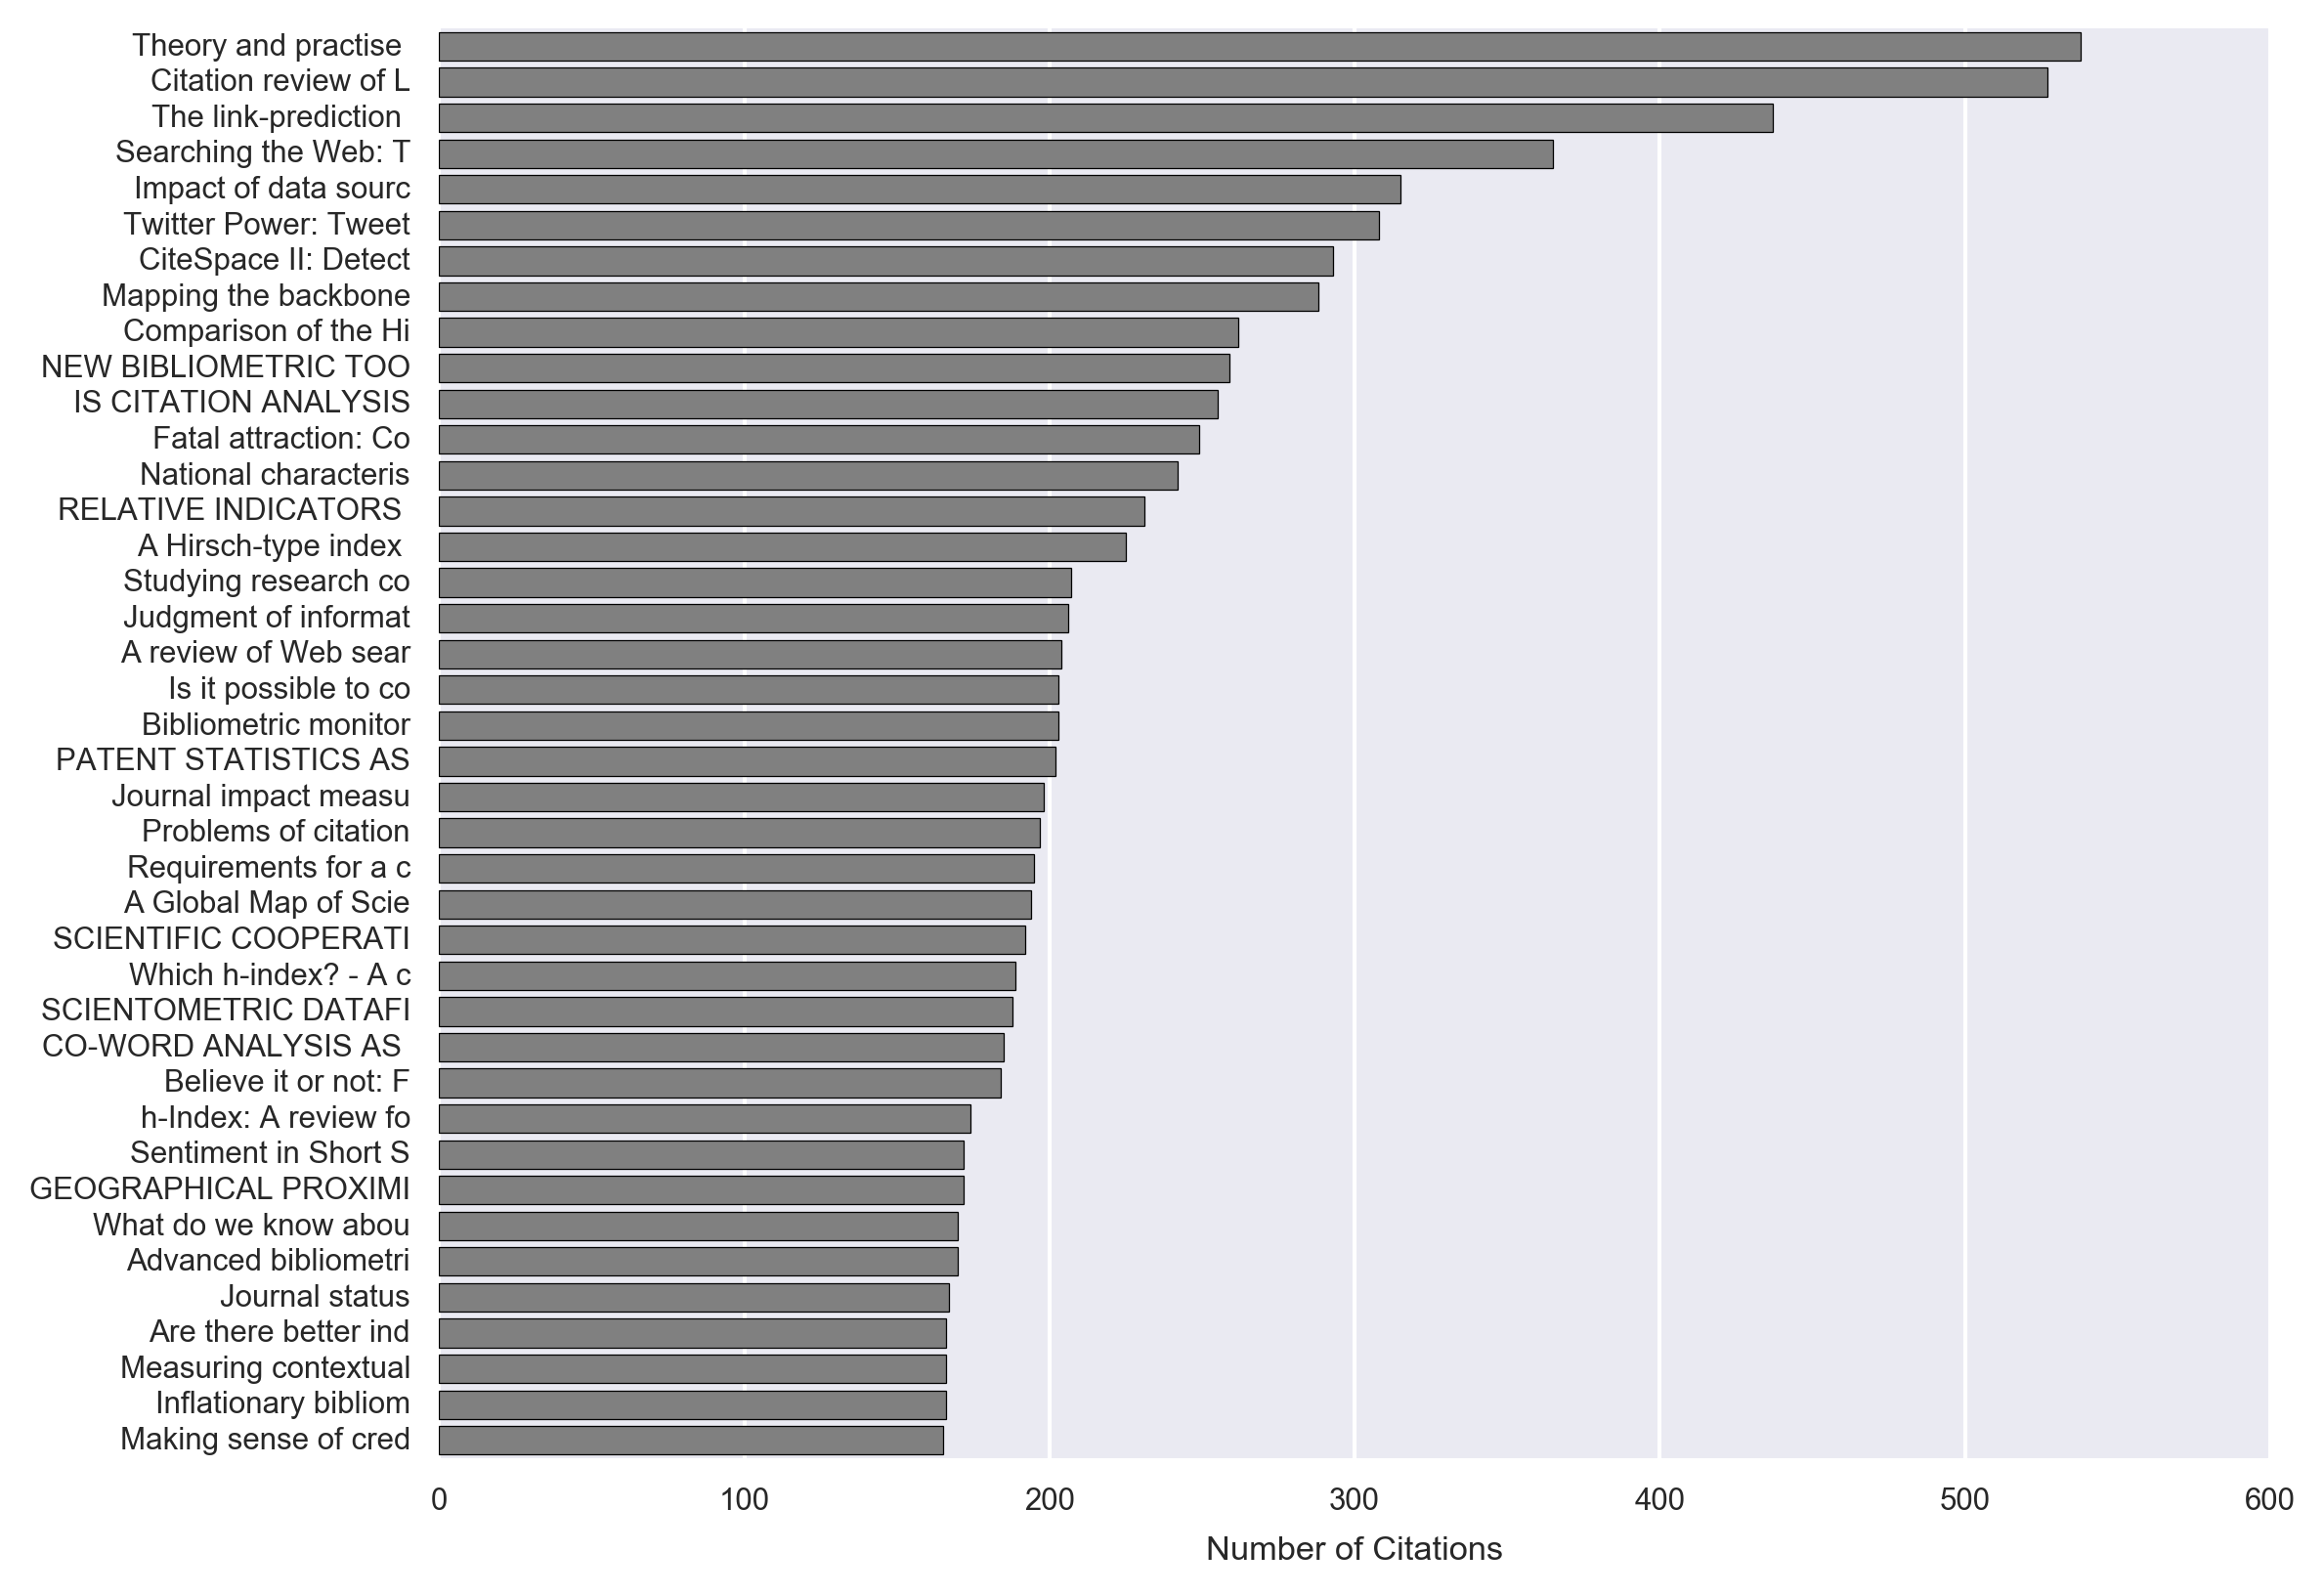

In [11]:
horizontal_bar = sns.barplot(data = top_40, x = 'TC', y = 'short_title', color = 'gray')
horizontal_bar.set(xlabel='Number of Citations', ylabel='')
sns.despine()
plt.tight_layout()
plt.savefig('figures/horizontal_barplot.pdf') # margins need adjustment

Creating Time Series Datasets
-----------------------------

It is also easy to plot time series graphs, for example of article publications over time. We can do this by use the `timeSeries` method in *metaknowledge*, and converting the results into a *Pandas* dataframe that can be easily plotted. We will write the time series dataset to a `csv` file at the same time. 

In [12]:
#[2:] removes incomplete data from 2016
growth = pandas.DataFrame(RC.timeSeries('year', outputFile = 'generated_datasets/growth.csv'))[2:]
growth

,count,entry,year
2,643,2014,2014
3,572,2013,2013
4,545,2012,2012
5,494,2011,2011
6,535,2010,2010
7,467,2009,2009
8,389,2008,2008
9,395,2007,2007
10,353,2006,2006
11,267,2005,2005


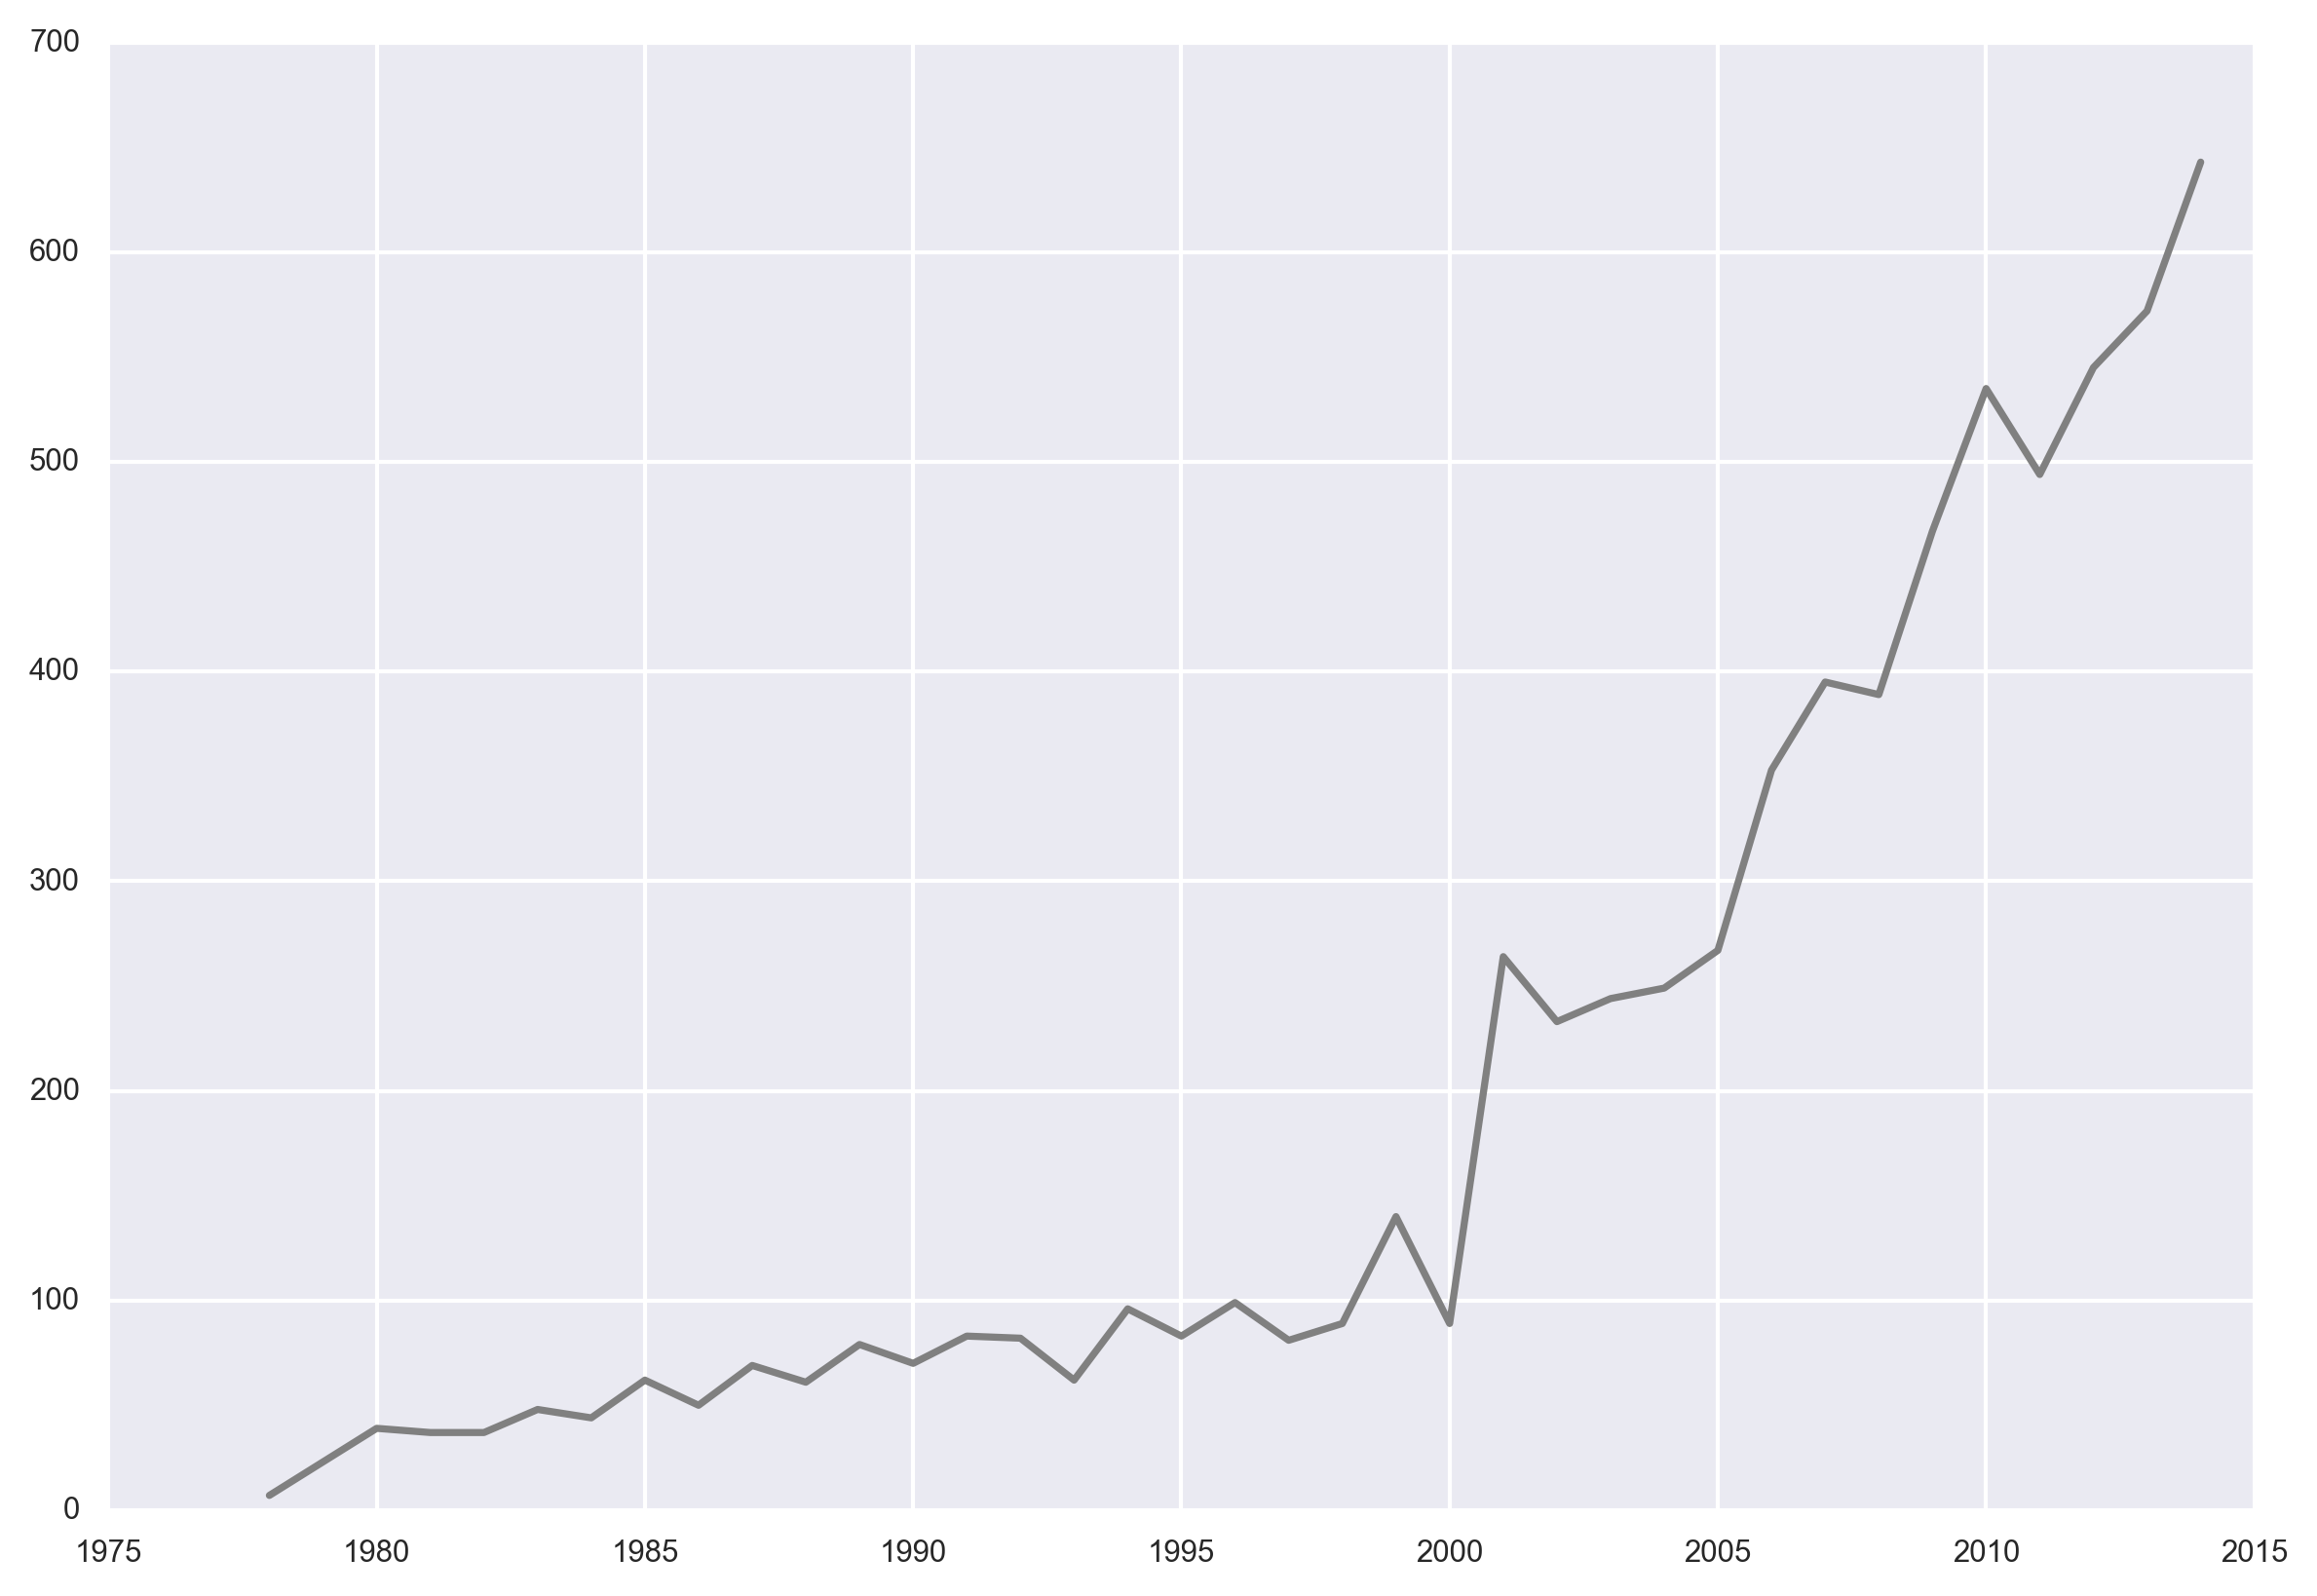

In [13]:
plt.plot(growth['year'], growth['count'], color = 'gray')
sns.despine() # improve the look of the plot
plt.tight_layout() # decrease white space around margins
plt.savefig("figures/growth_chart.pdf")

We can also plot a subset of the data. Below, we extract the data for *Scientometrics* and *The Journal of Informetrics* and plot them side by side.

In [23]:
subset = ['SCIENTOMETRICS', 'JOURNAL OF INFORMETRICS']
growth_by_journal = pandas.DataFrame(RC.timeSeries('journal', 
    outputFile = 'generated_datasets/growth_journals.csv', limitTo = subset))
growth_by_journal[:10]

,count,entry,year
0,143,SCIENTOMETRICS,2016
1,59,JOURNAL OF INFORMETRICS,2016
2,343,SCIENTOMETRICS,2015
3,84,JOURNAL OF INFORMETRICS,2015
4,338,SCIENTOMETRICS,2014
5,90,JOURNAL OF INFORMETRICS,2014
6,249,SCIENTOMETRICS,2013
7,103,JOURNAL OF INFORMETRICS,2013
8,252,SCIENTOMETRICS,2012
9,78,JOURNAL OF INFORMETRICS,2012


AttributeError: 'DataFrame' object has no attribute 'reverse'

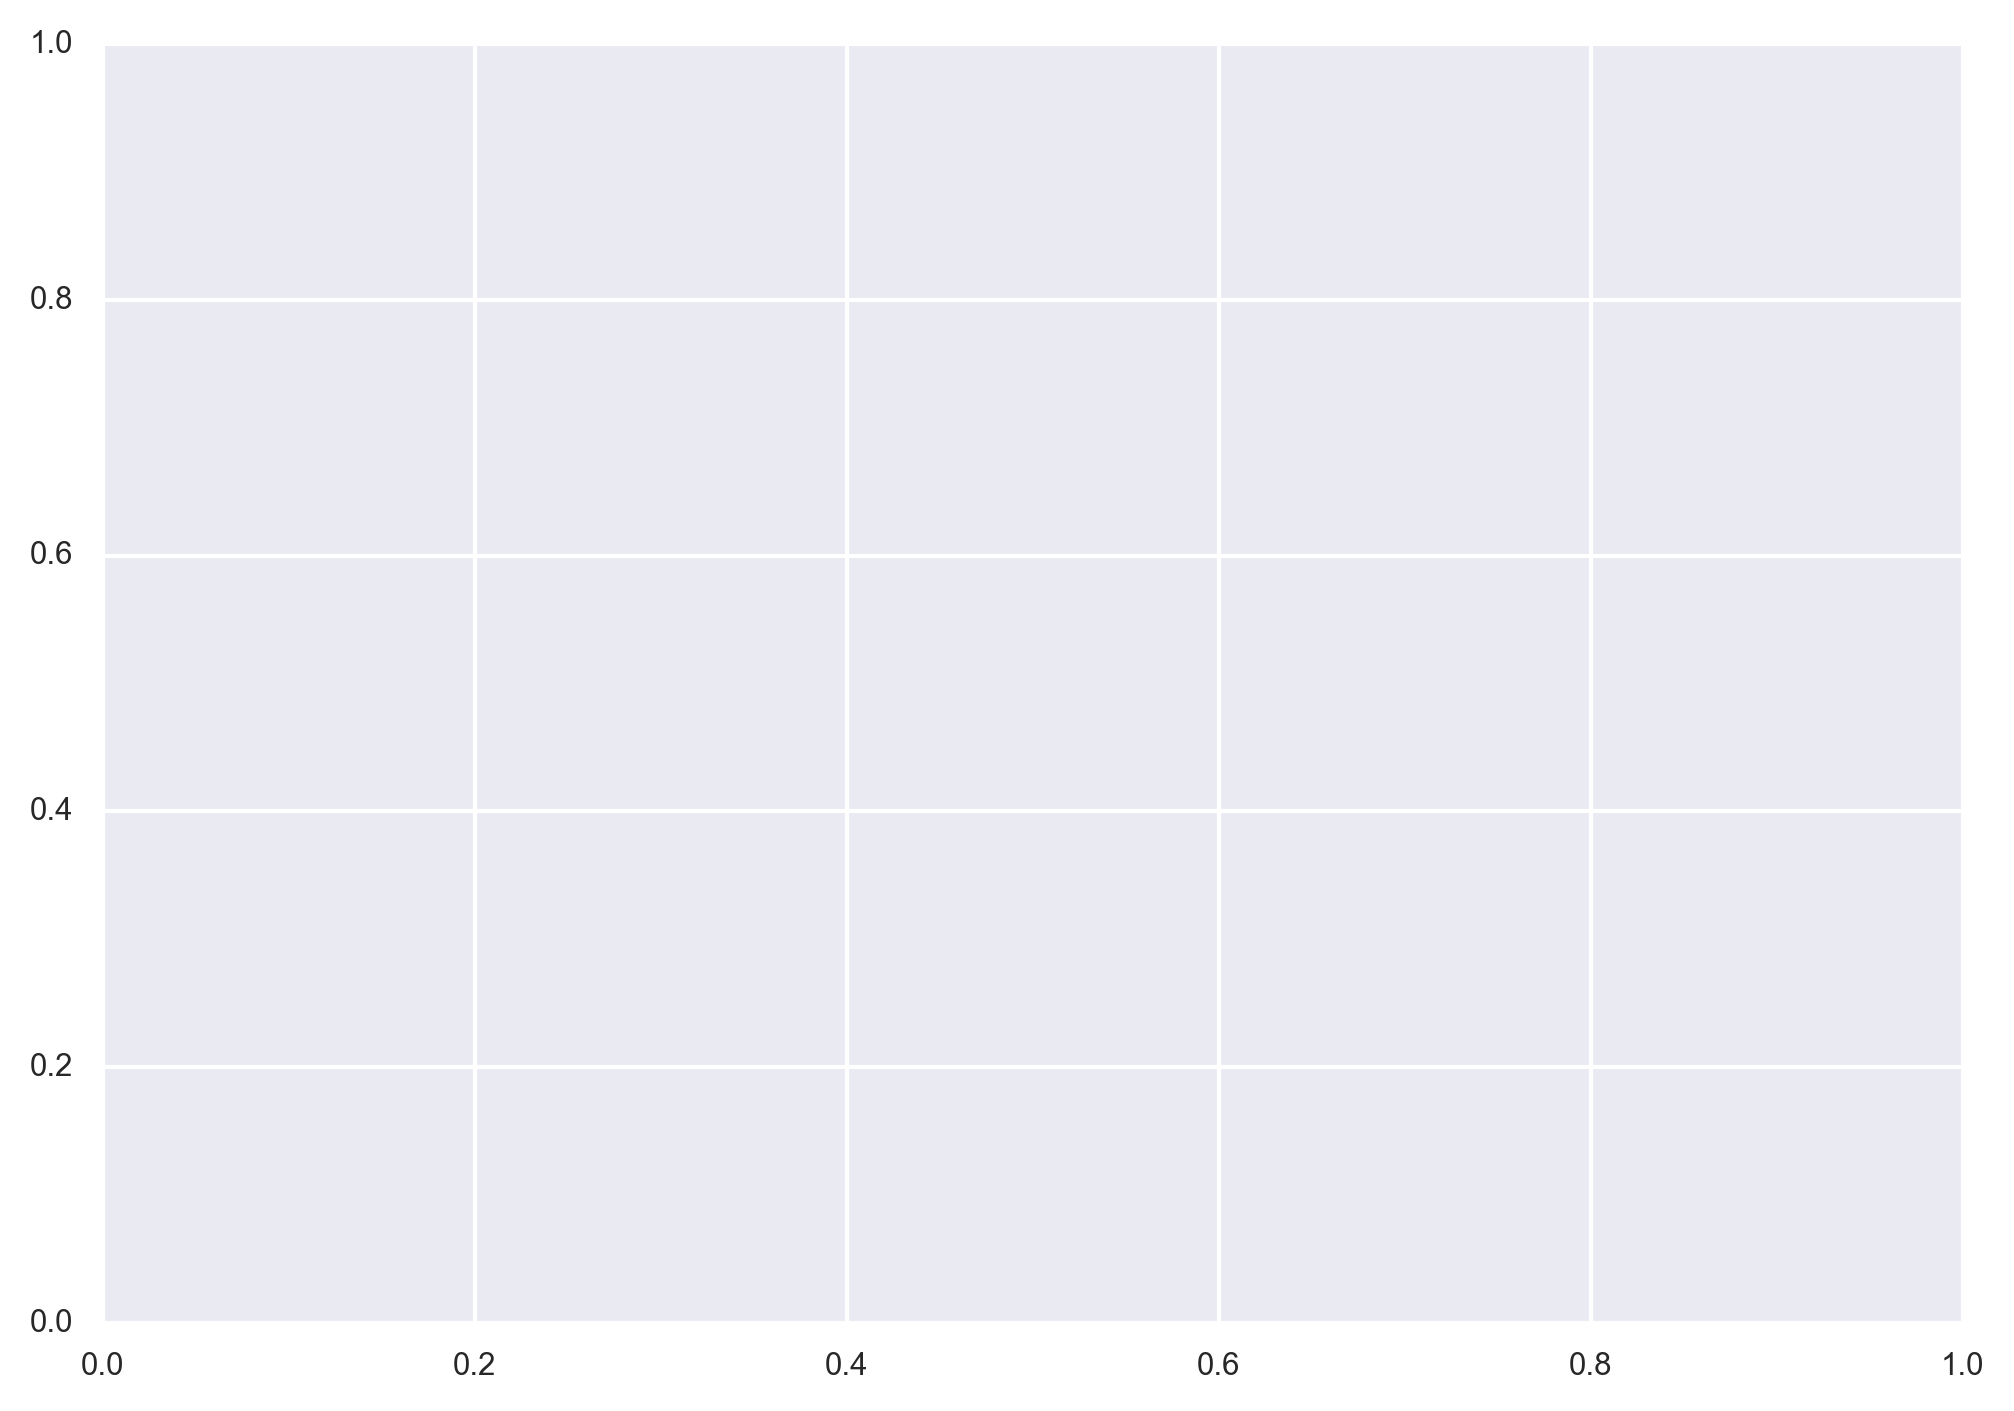

In [41]:
fig, ax = plt.subplots()
labels = []


growth_by_scientometrics = growth_by_journal[growth_by_journal['entry'] == 'SCIENTOMETRICS'][::-1]
growth_by_informetrics = growth_by_journal[growth_by_journal['entry'] == 'JOURNAL OF INFORMETRICS'][::-]
growth_by_scientometrics.plot(ax = ax, y ='count', x = 'year', label = 'SCIENTOMETRICS')
growth_by_informetrics.plot(ax = ax, y ='count', x = 'year', label = 'JOURNAL OF INFORMETRICS')
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
plt.savefig('figures/growth_small_multiples.pdf')


Other methods for working with `Record Collections` (e.g. for RPYS analysis, text analysis, and network analysis) are provided in the other supplementary Jupyter Notebooks. 